# **Assignment 3 - EDA**

---



In [4]:
import pandas as pd
from google.colab import files
from datetime import datetime

uploaded = files.upload()
data = pd.read_csv('EDAdata.csv')

data.head()

Saving EDAdata.csv to EDAdata.csv


,Store,Year,Month,Super Division,Sales,SGM,Store Open,Store Close,Outlet Type,State,Climate,Total Sq Ft,Store Modification Date,Store Modification
0,1,2015,2,GIRLS,63635.80,35692.09,1991-03-01 00:00:00,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
1,1,2015,2,BOYS,20872.93,15691.34,1991-03-01 00:00:00,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
2,1,2015,2,ACCESSORIES,38717.03,23866.25,1991-03-01 00:00:00,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
3,1,2015,2,KIDS,11455.00,12110.00,1991-03-01 00:00:00,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
4,1,2015,3,GIRLS,67507.77,42237.79,1991-03-01 00:00:00,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation


***Find total sales by year.***

In [35]:
#Answer

totalsales = data.groupby('Year')['Sales'].sum()
print(totalsales)

Year
2015    1.627585e+09
2016    1.843939e+09
2017    1.651322e+09
2018    1.492340e+09
2019    1.471963e+09
2020    6.510899e+07
Name: Sales, dtype: float64


***Number of Stores Opened in the Year 1991***

In [16]:
#Answer

data['Store Open'] = pd.to_datetime(data['Store Open'])
data['open_year'] = data['Store Open'].dt.year
print("The number of stores opened in the year 1991 :-",data['open_year'].value_counts()[1991])

data.drop('open_year', axis=1, inplace=True)

The number of stores opened in the year 1991 :- 819


***Number of Stores Remodelled During This Period***

In [19]:
data['Store Modification'].unique()

array(['relocation', 'remodel', 'no change', 'expansion'], dtype=object)

In [25]:
#Answer

remodelled = data[data['Store Modification'] == 'remodel']
print("The number of stores remodelled in total :-", len(remodelled))

remodelled1991 = remodelled[data['Store Open'].dt.year == 1991]
print("The number of stores remodeled during 1991 :- ",len(remodelled1991))

The number of stores remodelled in total :- 16681
The number of stores remodeled during 1991 :-  238


<ipython-input-25-ed9435ace1b3>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  remodelled1991 = remodelled[data['Store Open'].dt.year == 1991]


***Find the Direct Relationship Between Sales and Total Sq. Ft.***

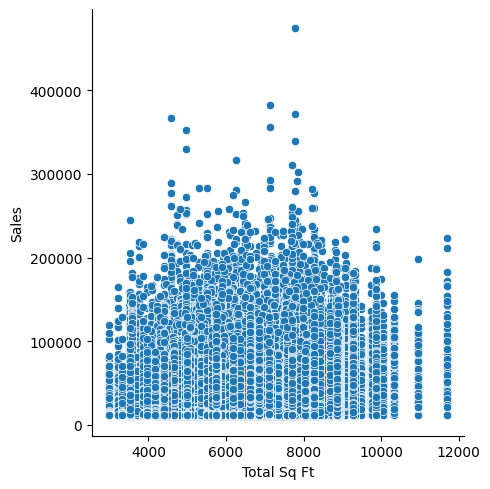

In [33]:
#Answer

import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='Total Sq Ft',y='Sales',data=data)

***Identify the Most Profitable Super Division***

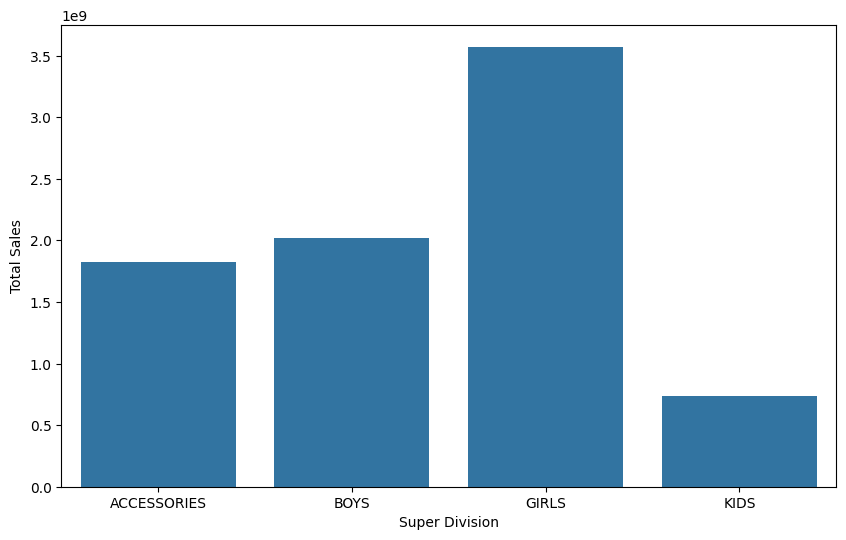

In [42]:
#Answer

superdivi = data.groupby('Super Division')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Super Division', y='Sales', data=superdivi)
plt.xlabel('Super Division')
plt.ylabel('Total Sales')
plt.show()

***Number of Active Stores***

In [48]:
#Answer

active = data[data['Store Close'] == 'No Close date']
print('The number of active stores :-', active['Store'].unique().shape[0])

The number of active stores :- 678


***Super Division with the Highest Average Total Sq. Ft.***

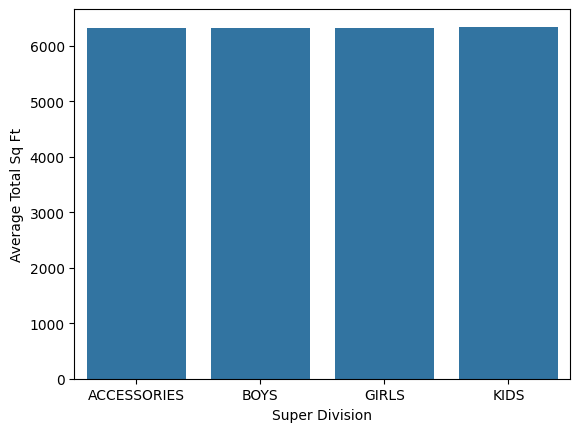

In [51]:
#Answer

avgtot = data.groupby('Super Division')['Total Sq Ft'].mean().reset_index()
#plt.figure(figsize=(10, 6))
sns.barplot(x='Super Division', y='Total Sq Ft', data=avgtot)
plt.xlabel('Super Division')
plt.ylabel('Average Total Sq Ft')
plt.show()

#Advanced Insights

***Top 3 Potential Candidate States for Opening a New Store***

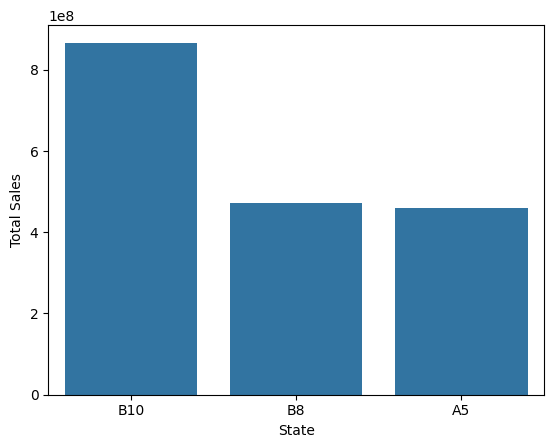

In [53]:
#Answer

top3 = data.groupby('State')['Sales'].sum().nlargest(3).reset_index()

sns.barplot(x='State', y='Sales', data=top3)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()


***Best Time of Year to Consider Opening a Store***

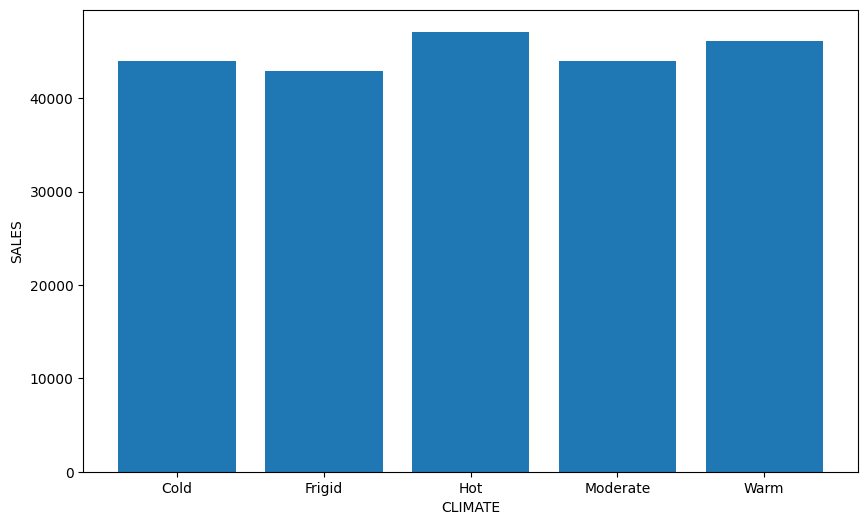

In [63]:
#Answer

sales = data.groupby('Climate')['Sales'].mean()

plt.figure(figsize=(10, 6))
plt.bar(sales.index, sales.values)
plt.xlabel('CLIMATE')
plt.ylabel('SALES')
plt.show()

***Analyzing Outlet-Type Effects Towards Store Closures***

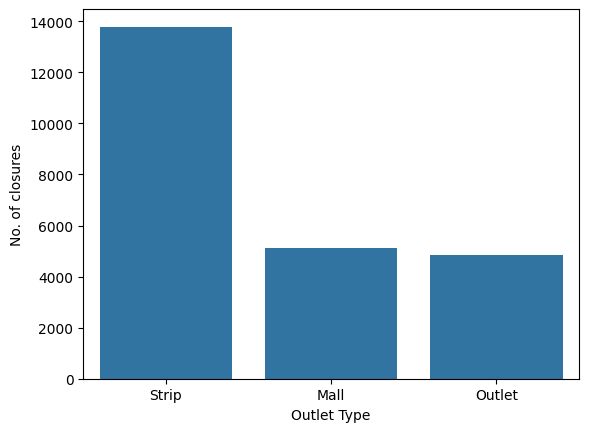

In [74]:
#Answer

closed = data[data['Store Close'] != 'No Close date']
outleteff = closed['Outlet Type'].value_counts().reset_index()

outleteff.columns = ['Outlet Type', 'No. of closures']

sns.barplot(x='Outlet Type', y='No. of closures', data=outleteff)
plt.xlabel('Outlet Type')
plt.ylabel('No. of closures')
plt.show()